<center><h1> Uber StatsML Exercise </h1></center>
<center><h4>Pranjal Bajaj</h4></center>

# Part 1: Data Analysis

## 1. Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read in the json file as a pandas dataframe

In [2]:
timestamps = pd.read_json('logins2 (1).json')

#### Explore the data

In [3]:
timestamps.shape

(97423, 1)

In [4]:
len(timestamps.index[timestamps.index.duplicated()].unique()) # no duplicates 

0

In [5]:
timestamps.head()

,login_time
0,2010-01-01 00:11:52
1,2010-01-01 00:13:00
2,2010-01-01 00:14:49
3,2010-01-01 00:21:00
4,2010-01-01 00:23:05


In [6]:
timestamps['login_time'].max()

Timestamp('2010-08-28 14:47:00')

In [7]:
timestamps['login_time'].min()

Timestamp('2010-01-01 00:11:52')

In [8]:
timestamps.isnull().sum() # no nulls

login_time    0
dtype: int64

### 1. Aggregate these login counts based on 15-minute time intervals

In [9]:
timestamps_index = timestamps.copy() # Make a copy 

In [10]:
# Index on the timestamp column 
timestamps_index.set_index('login_time', inplace=True)

In [11]:
timestamps_index.head()

""
login_time
2010-01-01 00:11:52
2010-01-01 00:13:00
2010-01-01 00:14:49
2010-01-01 00:21:00
2010-01-01 00:23:05


In [12]:
# Create column called count, which has value = 1 for each entry
timestamps_index['count'] = 1

In [13]:
# Aggregate using pandas resample method and save as a new dataframe 
timestamps_index = timestamps_index.resample("15Min").sum()

In [14]:
# Do sanity checks
print('           Head')
print(timestamps_index.head())
print('           Tail')
print(timestamps_index.tail())

           Head
                     count
login_time                
2010-01-01 00:00:00      3
2010-01-01 00:15:00      3
2010-01-01 00:30:00      7
2010-01-01 00:45:00      7
2010-01-01 01:00:00      5
           Tail
                     count
login_time                
2010-08-28 13:45:00      3
2010-08-28 14:00:00      4
2010-08-28 14:15:00      4
2010-08-28 14:30:00      4
2010-08-28 14:45:00      2


In [15]:
# Convert timestamp from index back to column and save as dataframe
timestamps_count = timestamps_index.reset_index(level=0)

In [16]:
timestamps_count.shape # check out dimensions

(23004, 2)

In [17]:
# Do sanity checks
print('                                        Head')
print(timestamps_count.head())
print('')
print('                                        Tail')
print(timestamps_count.tail())

                                        Head
           login_time  count
0 2010-01-01 00:00:00      3
1 2010-01-01 00:15:00      3
2 2010-01-01 00:30:00      7
3 2010-01-01 00:45:00      7
4 2010-01-01 01:00:00      5

                                        Tail
               login_time  count
22999 2010-08-28 13:45:00      3
23000 2010-08-28 14:00:00      4
23001 2010-08-28 14:15:00      4
23002 2010-08-28 14:30:00      4
23003 2010-08-28 14:45:00      2


#### Function automating above tasks

In [18]:
def get_interval(df, interval):
    
    '''
    Parameters
    ----------
    df : A dataframe with one column which contains timestamps.
    interval : A string containing the time interval specified as per pandas resample. 
    Refer to documentation here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
    
    Returns
    ----------
    Dataframe with : one column called `login_time` with time intervals and another column called `count` 
    with the number of entries in the time interval in login_time.
    
    Notes
    ----------
    Run using: df_15min = get_interval(timestamps, '15min')
    '''
    
    # Copy Data Frame 
    reindex_df = df.copy()
    
    # Set login_time as index
    reindex_df.set_index('login_time', inplace=True)
    
    # Initialize column called `count` with values = 1
    reindex_df['count'] = 1
    
    # Aggregate over with interval using resample
    reindex_df = reindex_df.resample(interval).sum()
    
    # Reset index i.e. bring login_time as a column
    reset_df = reindex_df.reset_index(level=0)
    
    return reset_df

### 2. Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 
### 3. Please report/illustrate important features of the demand, such as daily cycles

#### Yearly Plot 15 Minute Intervals

In [19]:
print("Mean logins in a 15-minute interval: {:.2f}".format(timestamps_count['count'].mean()))
print("Standard Deviation: {:.2f}".format(timestamps_count['count'].std()))

Mean logins in a 15-minute interval: 4.24
Standard Deviation: 2.80


In [20]:
print("Maximum logins in a 15-minute interval: {:}".format(timestamps_count['count'].max()))
print("Minimum logins in a 15-minute interval: {:}".format(timestamps_count['count'].min()))

Maximum logins in a 15-minute interval: 19
Minimum logins in a 15-minute interval: 0


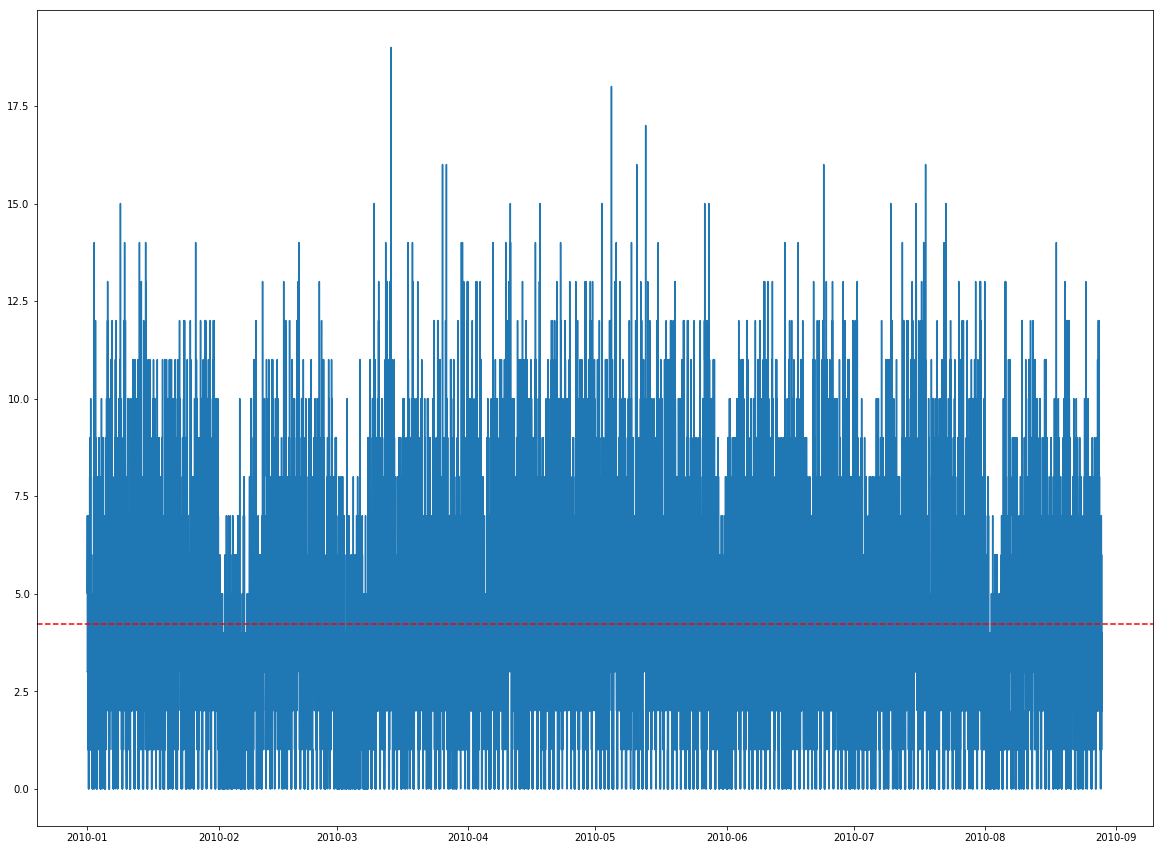

In [21]:
x = timestamps_count['login_time']
y = timestamps_count['count']
mean = timestamps_count['count'].mean()
plt.figure(figsize=(20,15))
plt.plot(x, y)
plt.axhline(mean, color='r', linestyle='--') # plot mean line 
plt.show()

- This plot shows yearly cycles for *number of user logins per 15-minute interval* with the mean plotted in red. 
- This plot **shows some sort of a cyclical pattern: Peaks in the middle of the month and troughs towards the end of the month** 
- This plot is not very meaningful since a yearly aggregation is too large relative to the 15-minute interval. 
- It is more meanigful to look at *average number of user logins per 15-minute interval* at other levels of aggregation such as hour of the day or day of the month to see underlying patterns. 

#### Exploring *average number of user logins per 15-minute interval* for different aggregation levels.

**1. Capture Daily trends**
- How **average number of user logins per 15-minute interval** vary within hours

------------------------

**2. Capture weekly trends**

- Look at weekends relative to other days

------------------------

**3. Capture within month trends**

- Look at holidays relative to other days 

------------------------

**4. Capture trends of full data**

- Look at seasonality in the data 


#### Averages for   `Hour of day`

In [22]:
timestamps_count['hour'] = timestamps_count['login_time'].apply(lambda x: x.hour)

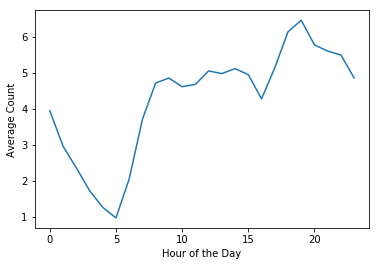

In [23]:
timestamps_count.groupby('hour')['count'].mean().plot(y='count', use_index=True)
plt.ylabel('Average Count')
plt.xlabel('Hour of the Day')
plt.show()

- Here we can notice that the *average number of user logins per 15-minute interval* is at *4* around midnight and then falls sharply until 5 AM. 
- From this time until 9:30 AM, the user logins for uber surges to close to *5* and then hovers close to *5* for most of the day. 
- There is a small dip in trip user logins around 4 PM and then rises sharply to over *6* close to 8 PM and then starts falling again as it gets later in the night. 

####   Averages for `Day of the Week`

In [24]:
timestamps_count['day_of_week'] = timestamps_count['login_time'].apply(lambda x: x.dayofweek)

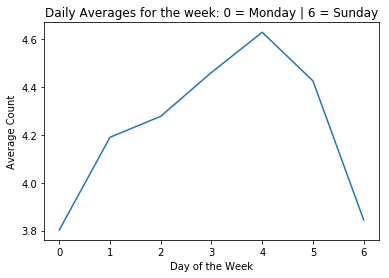

In [25]:
timestamps_count.groupby('day_of_week')['count'].mean().plot(y='count', use_index=True)
plt.title('Daily Averages for the week: 0 = Monday | 6 = Sunday')
plt.ylabel('Average Count')
plt.xlabel('Day of the Week')
plt.show()


- The *average number of user logins per 15-minute interval* increases from the begininng of the week until it peaks on Friday with an average of 4.6 trips. This then declines all the way to 3.8 trips by Sunday. 
- This pattern makes sense since people are likely to take taxis on fridays and saturdays since that's when they socialise.

####  Averages for `Day of the month`

In [26]:
timestamps_count['day_month'] = timestamps_count['login_time'].apply(lambda x: x.day)

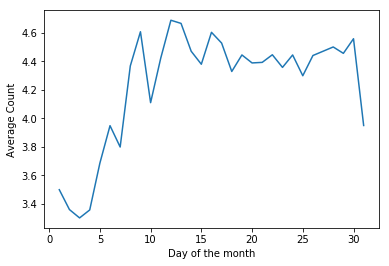

In [27]:
timestamps_count.groupby('day_month')['count'].mean().plot(y='count', use_index=True)
plt.ylabel('Average Count')
plt.xlabel('Day of the month')
plt.show()

- The *average number of user logins per 15-minute interval* in the first few days of the month tend to be on the lower end at about *3.5* and then continue to rise by the 8th day of the month to about *4.6* after which there is a steep fall to *4* for that month on the 10th and then continues to hover around 4.6.

####   Averages for `Days of the Year`

In [28]:
timestamps_count['day'] = timestamps_count['login_time'].apply(lambda x: x.dayofyear) 

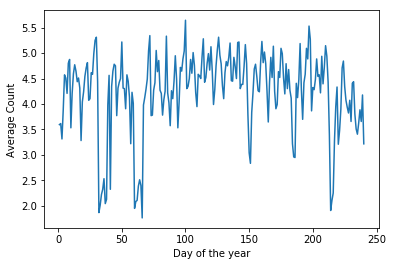

In [29]:
timestamps_count.groupby('day')['count'].mean().plot(y='count', use_index=True)
plt.ylabel('Average Count')
plt.xlabel('Day of the year')
plt.show()

- It is very interesting to note two sharp drops around the 30th and the 60th day of the year and another one around the 210th day of the year
- The trend remains stable otherwise with another drop around week 30.

####   Averages for `Weeks of the Year`

In [30]:
timestamps_count['week'] = timestamps_count['login_time'].apply(lambda x: x.week)

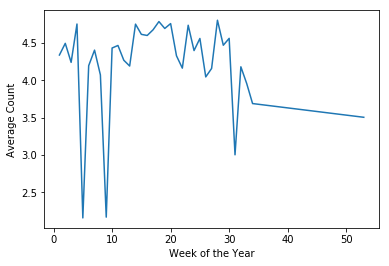

In [31]:
timestamps_count.groupby('week')['count'].mean().plot(y='count', use_index=True)
plt.ylabel('Average Count')
plt.xlabel('Week of the Year')
plt.show()

- It is very interesting to note two sharp drops around the 5th and the 10th week of the year which fall in the last week of January/ first week of february and first week of March respectively. 
- The trend remains stable otherwise with another drop around week 30.

####  Averages for `Month of the year`

In [32]:
timestamps_count['month'] = timestamps_count['login_time'].apply(lambda x: x.month) 

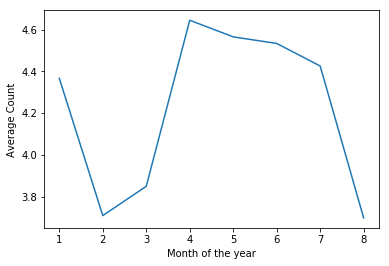

In [33]:
timestamps_count.groupby('month')['count'].mean().plot(y='count', use_index=True)
plt.ylabel('Average Count')
plt.xlabel('Month of the year')
plt.show()

- This plot is slightly more aggregated than the weekly plot. 
- There is a clear drop in user logins in February and a steep rise in April similar to the one in the week of the year plot above. 
- This could be associated with the fact that people travel less during extremely cold months and begin to travel more and hence use services like uber more when Spring/Summer start i.e. in April. 

#### References 
http://www.willfleury.com/machine-learning/forecasting/lstm/2017/09/01/short-term-forceasting-lstm.html

### Further Visualization and Analysis: Look Deeper into Within Day Trends

#### Overall Analysis 

In [34]:
timestamps_count.head()

,login_time,count,hour,day_of_week,day_month,day,week,month
0,2010-01-01 00:00:00,3,0,4,1,1,53,1
1,2010-01-01 00:15:00,3,0,4,1,1,53,1
2,2010-01-01 00:30:00,7,0,4,1,1,53,1
3,2010-01-01 00:45:00,7,0,4,1,1,53,1
4,2010-01-01 01:00:00,5,1,4,1,1,53,1


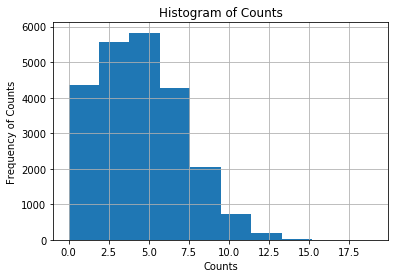

In [35]:
timestamps_count['count'].hist()
plt.title('Histogram of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency of Counts')
plt.show()

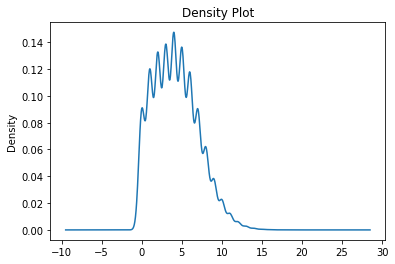

In [36]:
timestamps_count['count'].plot(kind='kde')
plt.title('Density Plot')
plt.show()

- The distribution **does not** seem to be Gaussian.
- The shape has a long right tail and may suggest an exponential distribution i.e. perhaps a **Poission distribution.**

#### Analysis within a Day
1. Group of timestamps by day while keeping time intervals at 15 minute frequencies
2. Visualise User Logins per 15-minute interval for each day 

#### Specify the range of days to get count variations for within a day

Reference: http://pbpython.com/pandas-grouper-agg.html

In [37]:
series_day = timestamps_count.groupby(['day', pd.Grouper(key='login_time', freq='15Min')])['count'].sum()

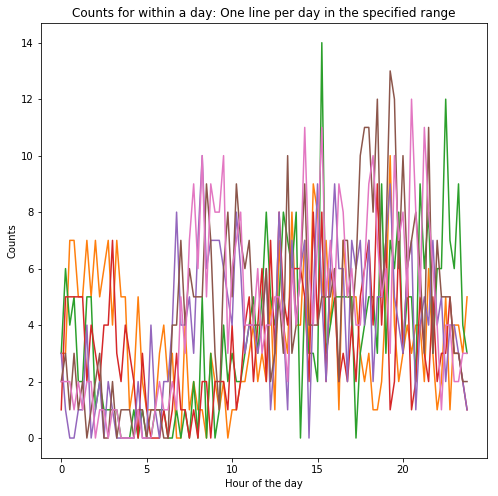

In [38]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7): # specify the range of days here
    ax.plot(series_day[series_day.index.get_level_values('day')==i].values, label = '%s data' % i)
    
    
ax.set_xticklabels([0, 0, 5, 10, 15, 20])
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Counts')

ax.set_title('Counts for within a day: One line per day in the specified range')
plt.show()

This above plot can be compared to the plot below (this appeared in the visualization section). The plot below is a mean of all the days. 

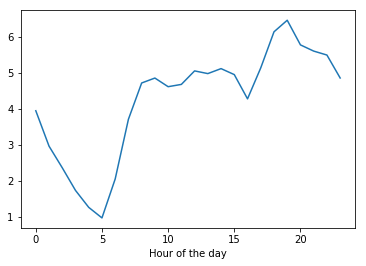

In [39]:
timestamps_count.groupby('hour')['count'].mean().plot(y='count', use_index=True)
plt.xlabel('Hour of the day')
plt.show()

#### Analysis within an hour of a day

In [40]:
# The newly created dataframe is indexed by hour and day both
series_hour = timestamps_count.groupby(['hour', 'day', pd.Grouper(key='login_time', freq='15Min')])['count'].sum()

In [41]:
def plot_hour_day(hour, day):
    '''    
    Parameters
    ----------
    hour : An integer with minimum value of 0 and maximum value of 23
    day : An integer with minimum value of 1 and maximum value of 239
    
    Returns
    ----------
    A matplotlib object that shows a plot of counts per 15 minute interval for a given hour in a given day
    
    Notes
    ----------
    Run using: plot_hour_day(hour = 0, day = 239)
    
    '''
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    # subsetting the dataframe by the specified hour and day
    ax.plot(series_hour[(series_hour.index.get_level_values('hour')==hour) & 
                        (series_hour.index.get_level_values('day')==day)].values)
    
    ax.set_xticklabels(['', 0, '', 15, '', 45, '', 60])
    
    # Set labels and titles
    plt.title('Counts within an hour (For a given day)')
    ax.set_xlabel('Minute of the Hour')
    ax.set_ylabel('Count')
    
    plt.show()

#### Plotting the Counts hour and day for the last hour in the dataset

In [42]:
series_hour.tail(4)

hour  day  login_time         
23    239  2010-08-27 23:00:00    12
           2010-08-27 23:15:00     6
           2010-08-27 23:30:00     8
           2010-08-27 23:45:00     3
Name: count, dtype: int64

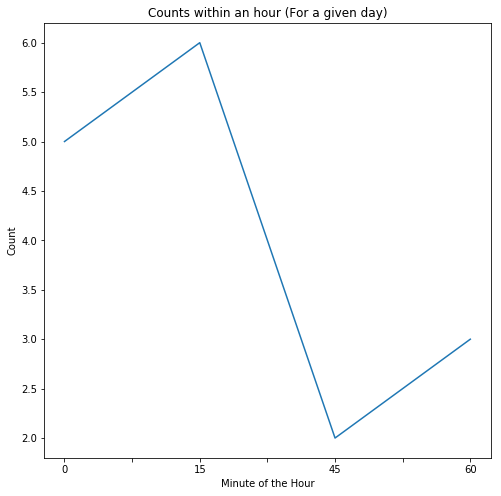

In [43]:
plot_hour_day(hour = 0, day = 239)

#### The task at hand is to predict the counts in the next hour

## II: Model: Forecasting expected future demand at the same 15-minute granularity over the following hour

### Aims
1. Based on the insights you developed above, **describe a method to forecast expected future demand at the same 15-minute granularity over the following hour (the 4 following time periods)**. 
2. Apply your method to this dataset, and evaluate its predictive accuracy in a reasonable way. 
3. Discuss your method and its accuracy.

### The case
- We have **COUNT DATA** which is integer values and has a **discrete distribution**
- Most statisitcal methods for time series prediciton are for continuus-valued targets i.e. price or sales and are usually distributed **normally**. 
- We try some **non-continous** versions of these statistical methods e.g. Moving Median and also try to fit some for conitnuous data such as Exponential Smoothing and discuss others like ARIMA. 
- We learn that none of these work well and then dicuss a more appropriate approach in while answering question 3


### Validation
- Train Set: 75%
- Test Set: 25% 

### Models 
- Naive Model: Use the value of last train point as the prediction 
- Simple Median: Since we have **count data** the median of the train data is the prediciton 
- Moving Median: Like a moving average, is medians derived from successive segments
- Exponential Smoothing: Exponential functions are used to assign exponentially decreasing weights over time. 
- ARIMA: is discussed but not applied since it doesn't make sense in our case

### Evaluation
- Predicitons will be evaluated using root mean squared error (RMSE). 
- This is the most appropriate method


In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#### Set up Train / Test Sets

In [45]:
timestamps_model = timestamps_count[['login_time', 'count']]

In [46]:
timestamps_model.set_index('login_time', inplace = True)

In [47]:
train_size = len(timestamps_model) * 0.75
test_size = len(timestamps_model) * 0.25
print("Train Size: {:}".format(train_size))
print("Test Size: {:}".format(test_size))
print("Train + Test Size: {:}".format(train_size + test_size))

Train Size: 17253.0
Test Size: 5751.0
Train + Test Size: 23004.0


In [48]:
train = timestamps_model[0:17250] 
test = timestamps_model[17250:]

In [49]:
timestamps_model = timestamps_model.resample('H').mean()

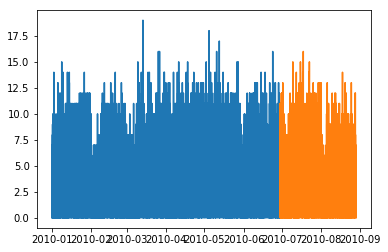

In [50]:
plt.plot(train['count'])
plt.plot(test['count'])
plt.show()

#### 1. Sklearn Modelling

##### Knn

In [68]:
idx = train.index.values
count = train.values

array(['2010-01-01T00:00:00.000000000', '2010-01-01T00:15:00.000000000',
       '2010-01-01T00:30:00.000000000', ...,
       '2010-06-29T15:45:00.000000000', '2010-06-29T16:00:00.000000000',
       '2010-06-29T16:15:00.000000000'], dtype='datetime64[ns]')

In [54]:
from datetime import datetime
from sklearn.neighbors import NearestNeighbors
from datetime import timedelta

In [58]:
train.iloc[1]

count    3
Name: 2010-01-01 00:15:00, dtype: int64

numpy.datetime64('2010-01-01T00:00:00.000000000')

In [64]:
datetime.strptime(train.index.values[0], "%y-%m-%d %H:%M")

TypeError: strptime() argument 1 must be str, not numpy.datetime64

In [ ]:
X = []
for i in range(len(train)):
    X.append(datetime.strptime(train[i], "%y-%m-%d %H:%M"))
y = []
for i in range(len(train[])):
    y.append(humidity[i])
    
X_test = []
for i in range(len(train[])):
    X_test.append(datetime.strptime(timestamps[i], "%y-%m-%d %H:%M"))
    
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric=datetime.timedelta).fit(X)

y_test = nbrs.predict(X_test)

return y_test

##### Gradient Boosting

#### 1. Naive Approach

8.0


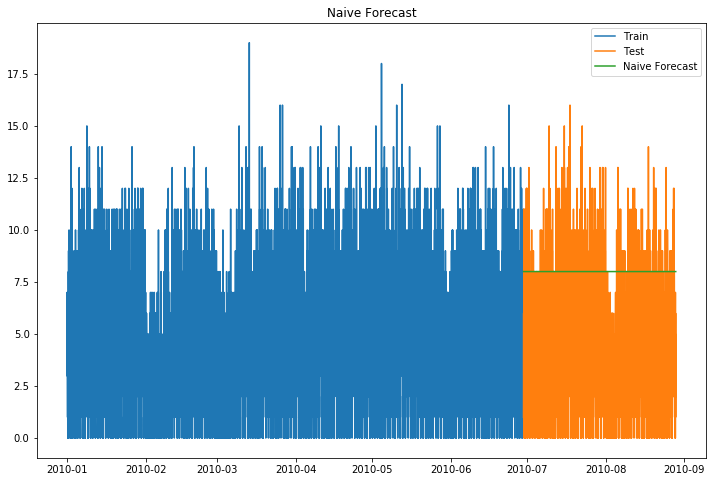

In [51]:
dd = np.asarray(train)
y_hat = test.copy() 
plt.figure(figsize=(12,8))
print(float(dd[len(dd)-1]))
y_hat['naive'] = float(dd[len(dd)-1])
plt.plot(train.index, train['count'], label='Train')
plt.plot(test.index,test['count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [52]:
rms = sqrt(mean_squared_error(test['count'], y_hat['naive']))
print(rms)

4.745522742188518


#### 2. Simple Median Approach

4.0


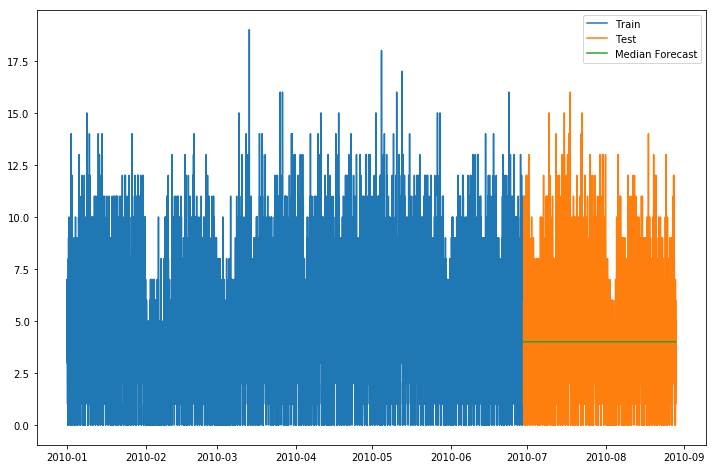

In [53]:
y_hat_med = test.copy()
y_hat_med['med_forecast'] = train['count'].median()
print(train['count'].median())
plt.figure(figsize=(12,8))
plt.plot(train['count'], label='Train')
plt.plot(test['count'], label='Test')
plt.plot(y_hat_med['med_forecast'], label='Median Forecast')
plt.legend(loc='best')
plt.show()

In [54]:
rms = sqrt(mean_squared_error(test['count'], y_hat_med['med_forecast']))
print(rms)

2.705187539637311


#### 3. Moving Median Approach

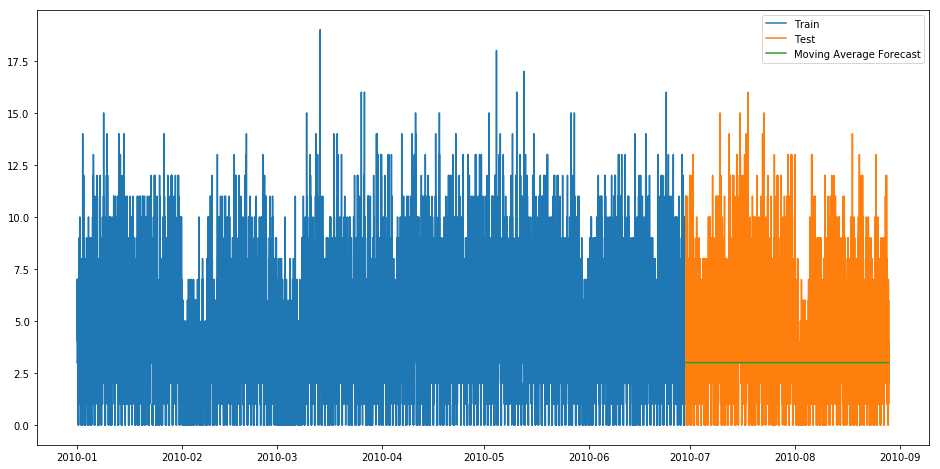

In [55]:
y_hat_avg = test.copy()
y_hat_avg['moving_median_forecast'] = train['count'].rolling(60).median().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['count'], label='Train')
plt.plot(test['count'], label='Test')
plt.plot(y_hat_avg['moving_median_forecast'], label='Moving Median Forecast')
plt.legend(loc='best')
plt.show()

In [56]:
rms = sqrt(mean_squared_error(test['count'], y_hat_avg['moving_median_forecast']))
print(rms)

2.9184847107024736


#### 5. Expnential Smoothing:
Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. 

- Trend (T): The long-term direction: **There is no long term direction**
- Seasonal (S): A pattern that repeats itself with known periodicity: ** Daily, Weekly and Monthly Patterns as we noted above in part 1. These seem to be additive**
- Error or Noise (E): The unpredictable component of the series: **This is additive **

In [57]:
import statsmodels.api as sm

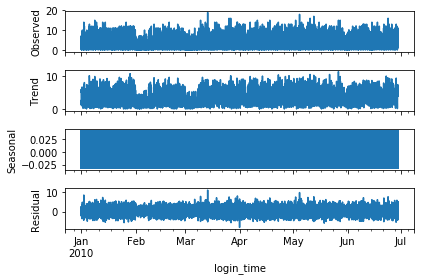

In [58]:
sm.tsa.seasonal_decompose(train['count'], model=  'additive', freq=4).plot()
result = sm.tsa.stattools.adfuller(train['count'])
plt.show()

- Statsmodels was **unable to pick any seasonality in the data.** The *trend* is the same as *observed* and hence, it doesn't make any sense.
- Based on observations in the ** First part of this assignment ** we will try seasonal periods i.e **cycles** of: 

- Each **Day** occurs after 96 15-minute intervals
- Each **Week** occurs after 744 15-minute intervals
- Each **Month** occurs after 2976 15-minute intervals

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing

/Users/pranjalbajaj/anaconda/lib/python3.6/site-packages/statsmodels-0.10.0-py3.6-macosx-10.7-x86_64.egg/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2.6246806043898765


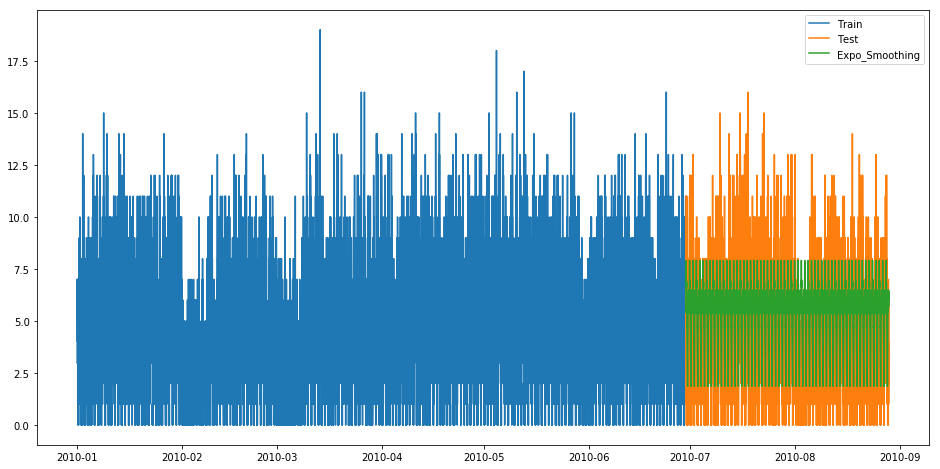

/Users/pranjalbajaj/anaconda/lib/python3.6/site-packages/statsmodels-0.10.0-py3.6-macosx-10.7-x86_64.egg/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


4.720195723299137


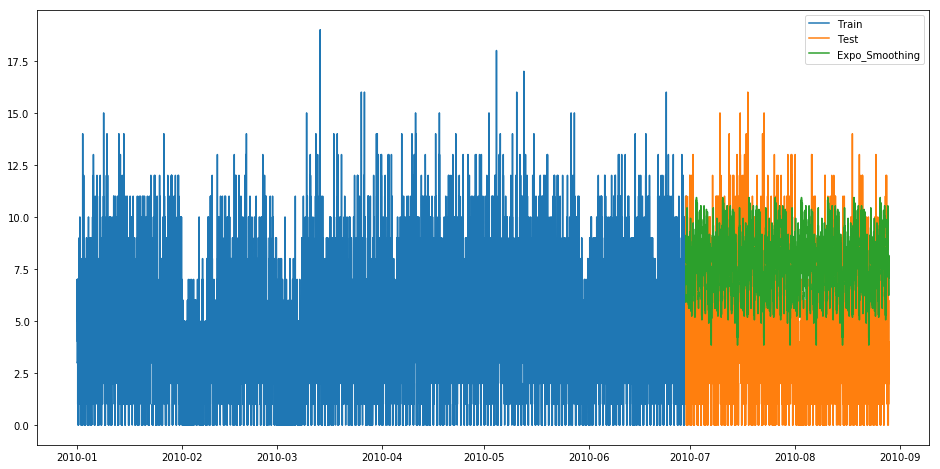

/Users/pranjalbajaj/anaconda/lib/python3.6/site-packages/statsmodels-0.10.0-py3.6-macosx-10.7-x86_64.egg/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.040382236364275


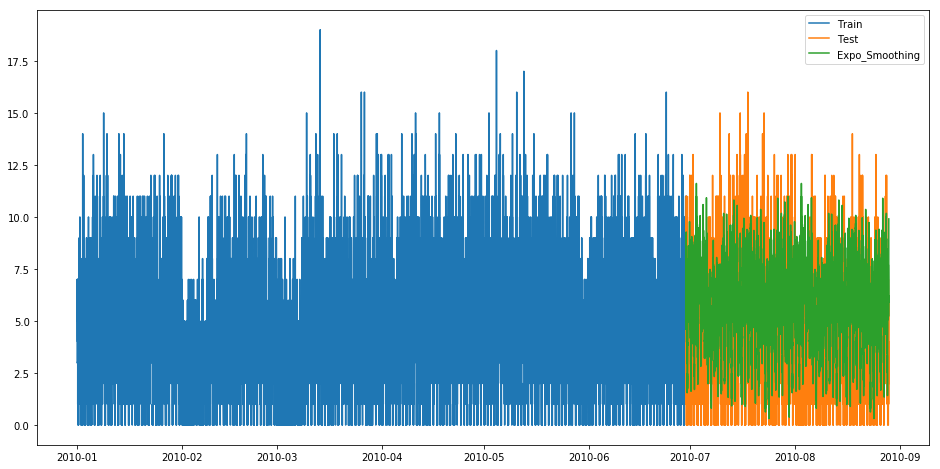

In [60]:
seasonal_list = [96, 744, 2976]
for i in seasonal_list: 
    y_hat_avg = test.copy()
    fit1 = ExponentialSmoothing(np.asarray(train['count'].astype(float)), seasonal_periods=i, trend= None, seasonal='add').fit()
    y_hat_avg['Expo_Smoothing'] = fit1.forecast(len(test))
    rms = sqrt(mean_squared_error(test['count'], y_hat_avg['Expo_Smoothing']))
    print(rms)
    plt.figure(figsize=(16,8))
    plt.plot( train['count'], label='Train')
    plt.plot(test['count'], label='Test')
    plt.plot(y_hat_avg['Expo_Smoothing'], label='Expo_Smoothing')
    plt.legend(loc='best')
    plt.show()

#### 6. ARIMA: Autoregressive Integrated Moving Average (ARIMA)

#### The concept
- The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually
- Analysis of the time series data assumes that we are working with a stationary time series
- The time series is aassumed to be certainly non-stationary. We can make it stationary this by first differencing the series and using a statistical test to confirm that the result is stationary

#### Application
- Our data has **no over all trend for the long term**
- So we don't need to "difference it"
- The cyclical movement in the series is seemingly **DAILY**, **WEEKLY** and **MONTHLY**

                    ** Hence, ARIMA will not make sense in this case ** 


#### Conclusion
- We get the loawest RMSE of 2.62 when using Exponential Smoothing is used with **DAILY CYCLES**. An RMSE is 2.62 means that on average the model was wrong by about 2.62 counts for each prediciton made, which **is better than prediciting the median of the train set to be prediciton**; however, is **not a good score at all**

- However, the last plot in the modelling section, which corresponds to Exponential Smoothing is used with **MONTLY CYCLES** is the most visually appealing as it mimics the

- The main reason for this poor model performance is that the models we have used do not appropriately fit the case. In the **next answer** I will discuss a more appropriate model to forecast sales at a 15-minute granuality. 

### 3. Probability 

Not only are accurate mean predictions important, but so are appropriate characterizations of the stochastic nature of this demand. If not already done in part 2, describe a method to predict the probability distribution of demand in the following 15-minute period. Describe how you would evaluate accuracy of these stochastic predictions. You don’t have to apply your method to the dataset.

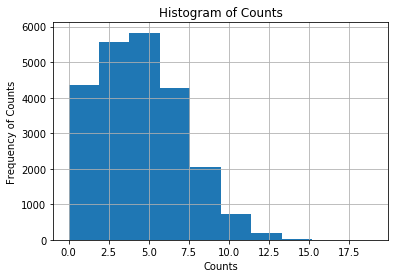

In [61]:
timestamps_count['count'].hist()
plt.title('Histogram of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency of Counts')
plt.show()

In [62]:
print("Mean logins in a 15-minute interval: {:.2f}".format(timestamps_count['count'].mean()))
print("Variance of logins in a 15-minute interval: {:.2f}".format(timestamps_count['count'].var()))

Mean logins in a 15-minute interval: 4.24
Variance of logins in a 15-minute interval: 7.84


- Since this is count data, **a Poisson Distribution would be appropriate to model the demand** 
- **Poisson distributed data intrinsically integer-valued**, which makes sense for count data. 
- The data also has a **right tail (above), suggesting that an exponential distribution like Poisson would make sense**
- Further, the mean and variance of the the counts are not too far off from each other, another indicator of Poisson Distribution being a reasonable assumption

$$ $$$$ Y_{t+1} \sim \textrm{Pois}(\mathbb E(y | x_{t} )) $$

In [63]:
import statsmodels.api as sm

In [64]:
timestamps_count.head()

,login_time,count,hour,day_of_week,day_month,day,week,month
0,2010-01-01 00:00:00,3,0,4,1,1,53,1
1,2010-01-01 00:15:00,3,0,4,1,1,53,1
2,2010-01-01 00:30:00,7,0,4,1,1,53,1
3,2010-01-01 00:45:00,7,0,4,1,1,53,1
4,2010-01-01 01:00:00,5,1,4,1,1,53,1


In [65]:
data = np.asarray(timestamps_count.drop(['count', 'login_time'], axis = 1))

y = np.asarray(timestamps_count['count'])

In [66]:
# Instantiate a Poisson family model with the default link function.
poisson_model = sm.GLM(y, data, family=sm.families.family.Poisson())

poisson_results = poisson_model.fit()

print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                23004
Model:                            GLM   Df Residuals:                    22998
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54154.
Date:                Sat, 01 Sep 2018   Deviance:                       40104.
Time:                        10:22:51   Pearson chi2:                 3.72e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0410      0.000     86.676      0.000       0.040       0.042
x2             0.0078      0.002      4.863      0.0

We can note here that ALL the variables are significant at 1% level however, have extremely low coefficients except for **month** which has a positive coefficient of 0.78. 

### Modelling Approach: Hidden Markov Models

#### Step 1: Find a Probability Distribution:


* Since we have integer-valued data which has has discrete distribution, we need to find an appropriate probability distribution for the counts i.e. Poisson with parameter lambda. 
* Then we need to find a way to get this lambda (Maximum Likelihood Estimate) using hour , day, month, etc as the features we built in the first part 

#### Step 2: Find a state sequence 
- Find the most probable sequence of states generating the observations through the Viterbi algorithm

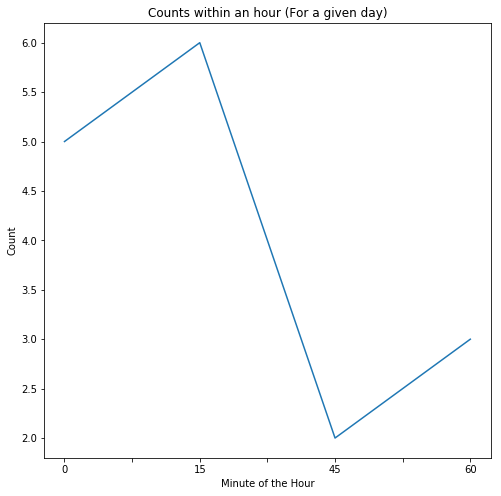

In [67]:
plot_hour_day(hour = 0, day = 239)

- Since there are 4 points in one hour, there are 3 state changes **(as above)** and there are three sequences through which counts are transitioning. 
- Hence, we will have 3 states
- Other number of states can be experimented with and can be selected using BIC that penalizes complexity and prevents from overfitting

#### Step 3: Learn the model
- `hmmlearn` available in python has a standard implementation with Normal distribution however, the base class can be modified to use a **Poisson distribution**
- Link: https://hmmlearn.readthedocs.io

#### Make Predicitons / Forecast

#### Evaluating Accuracy
- Mean-Square Error (MSE) may be used again to evaluate the accuracy of the model again since we used it to evaluate models in the previous part

References: 
- https://towardsdatascience.com/hidden-markov-models-for-time-series-classification-basic-overview-a59b74e5e65b
- http://www.stat.columbia.edu/~rdavis/lectures/ambleside00.pdf

Further reading:
- http://lasa.epfl.ch/teaching/lectures/ML_MSc_Advanced/Slides/Lec_XI_HMM_extensions.pdf
- https://www.coursera.org/lecture/probabilistic-graphical-models/temporal-models-hmms-goxoT

## Part 2: Programming Exercise

### Question

Say we have a set of cuisines, each of which can be represented by a letter of the alphabet, and a set of dishes within each cuisine, each of which can be represented by a number. Each cuisine has a different number of possible dishes available. Note: this exercise needs to be completed without the use of library functions that perform the enumeration.

A menu consists of a set of dishes chosen from the different cuisines. A menu can be represented by a list of dishes such as “A3 B11 C4”. Assume that each menu contains exactly one dish from each cuisine and all cuisines are included. Write a program that takes the number of cuisines and the number of dishes available within each cuisine as input and lists all possible menus as output.

#### Reinterpretation of the question

Menu **>** Set of cuisines (represented by alphabet) **>** Set of dishes within each cuisine (represented by alphabet)

e.g. be represented by a list of dishes such as A3 B11 C4

Assumption: Each menu contains exactly one dish from each suisine and all cuisines included

<center> **Input:**</center> 
<center>**Number of cuisines, Number of dishes available within each cuisine**</center> 
<center>**Output:**</center> 
<center>**All possible Menus**</center> 


In [68]:
import string
def recurse(n, cuisineNames, numCuisines, indices, numDishes, menus):
    
    while indices[n] < numDishes[n]:
        
        menu = ''
        
        for p in range(numCuisines):
            
            menu += (cuisineNames[p] + str(indices[p]+1) + ' ')
            
            # print(menu)
            menus.append(menu)
            
            for k in range(n):
                recurse(k, cuisineNames, numCuisines, indices, numDishes, menus)
                
                indices[n] += 1
            indices[n] = 0
            
def menuGenerator(numCuisines, numDishes):
    
    cuisineNames = string.ascii_uppercase
    
    menus = []
    
    indices = [0] * numCuisines
    
    for n in range(numCuisines):
        
        recurse(n, cuisineNames, numCuisines, indices, numDishes, menus)
    # print(menus)

    return set(menus)

#### Test Case 1

In [69]:
numCuisines = 3
numDishes = [2,2,2]
menuGenerator(numCuisines, numDishes)

{'A1 B1 C1 ',
 'A1 B1 C2 ',
 'A1 B2 C1 ',
 'A1 B2 C2 ',
 'A2 B1 C1 ',
 'A2 B1 C2 ',
 'A2 B2 C1 ',
 'A2 B2 C2 '}

#### Test Case 2

In [70]:
numCuisines = 2
numDishes = [2,2]

menuGenerator(numCuisines, numDishes)

{'A1 B1 ', 'A1 B2 ', 'A2 B1 ', 'A2 B2 '}